In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

(6)

In [141]:
def x_prime(v0,b): #pochodna x
    dxdb= v0*np.cos(b)
    return dxdb
    
def y_prime(v0,b): #pierwsza pochodna y
    t=np.linspace(0,5,10000)
    dydb= v0*np.sin(b)-g*t
    return dydb

In [148]:
def v_x(v0,b): #pochodna x
    v_x= v0*np.cos(b)
    return v_x
    
def v_y(v0,b): #pierwsza pochodna y
    t=np.linspace(0,5,10000)
    v_y= v0*np.sin(b)-g*t
    return v_y

ValueError: x and y must have same first dimension, but have shapes (1,) and (10000,)

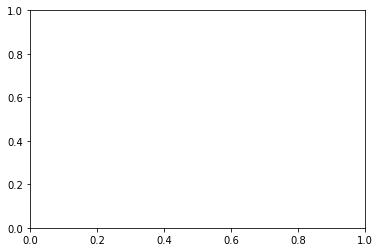

In [149]:
plt.plot(v_x(v0,b), v_y(v0,b)
        )  
ax = plt.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

In [14]:
x_prime(2,2)

-0.8322936730942848

(7)
dlaczego nie k=k1+...

In [15]:
t = np.linspace(0,2,21)
def x_bis(v,b,k1,k2,omega0,t,tał): #2pochodna x
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)    #brak k=k1+...?
    w=k*v**2
    omega=omega0(1-np.exp(-t/tał))
    
    ddx=-(1/m)*w*np.cos(omega+b)
    return ddx

In [16]:
def y_bis(v,b,k1,k2,omega0,t,tał): #2pochodna y
    g=9.81
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    w=k*v**2
    omega=omega0(1-np.exp(-t/tał))
    
    ddy=(1/m)*w*np.sin(omega+b)- m*g
    return ddy

O co tu wgl chodzi

In [17]:
def x_prime_fun(v,b): #pochodna x
    dxdb= lambda y,t: v*np.cos(b) #działa ale to t tak z dupy
    return dxdb
    
def y_prime_fun(v,b): #pierwsza pochodna y
    dydb= lambda y,t: v*np.sin(b)
    return dydb

In [18]:
x_prime2(2,2)

NameError: name 'x_prime2' is not defined

dalej bląd z k i dlaczego w=k*v a nie **v

In [19]:
f=y_prime(v,b)
z=x_prime(v,b)

def x_bis_fun(v,b,k1,k2,omega0,t,tał): #2pochodna x

    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    ddx= lambda y,t: -(1/m)*w*(z*np.cos(omega)+f*np.sin(omega))
    return ddx

def y_bis_fun(v,b,k1,k2,omega0,t,tał): #2pochodna y
    g=9.81
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/v)
    w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    ddy=(1/m)*w*np.sin(omega+b)- m*g
    return ddy

NameError: name 'v' is not defined

In [ ]:
def odeEuler(f,y0,t):
    """
    approximate the solution of y'=f(y,t) by Euler's method
    """
    y=np.zeros(len(t))
    y[0]=y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [20]:
def ode2Euler(time,amount,v,b,u0,k1,k2,omega0,tał): #czas, ile próbek czasu, prędkość, kąt nachylenia v do poziomu, war początkowy
    t=np.linspace(0,time,amount)
    f=x_prime(v,b)
    u=odeEuler(f,0,t)
    
    f2=x_bis_fun(v,b,k1,k2,omega0,t,tał)
    uu=odeEuler(f2,0,t)
    
    return uu
    

In [102]:
time=3
amount= 25
v=26.5
b=20
u0=1
k1=0.001
k2=0.65
omega0=46.5
tał=0.32
g=9.81
ode2Euler(time,amount,v,b,u0,k1,k2,omega0,tał)


NameError: name 'odeEuler' is not defined

wykres dla pierwszej pochdnej x

In [22]:
t = np.linspace(0,2,21)

y0 = 0
v=26.5
b=0
p = x_prime_fun(v,b)
#np.reshape(t,int(f))
#f = lambda y,t: y
y = odeEuler(p,y0,t)

plt.plot(t,y,'b.-')



plt.legend(['Euler'])
#plt.axis([0,2,0,9])
plt.grid(True)
#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()

NameError: name 'odeEuler' is not defined

In [23]:
t = np.linspace(0,2,21)
y0 = 0
v=26.5
b=0
h = y_prime_fun(26,0)
#f = lambda y,t: y
y = odeEuler(h,y0,t)
#y_true = np.exp(t) #nieistotne jakby co
plt.plot(t,y,'b.-')#,t,y_true,'r-')
plt.legend(['Euler','True'])
#plt.axis([0,2,0,9])
plt.grid(True)
#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()

NameError: name 'odeEuler' is not defined

**Moje** (powyżej tylko komentarze do madzi):

In [24]:
f = x_prime_fun(v,b)
h= y_prime_fun(v,b)

plt.plot(odeEuler(f,y0,t), odeEuler(h,y0,t), 0, 6)

NameError: name 'odeEuler' is not defined

In [25]:
def v_x(v,b): #pochodna x
    v_x= lambda y,t: dxdb/np.cos(b) #działa ale to t tak z dupy
    return 

    
def y_prime2(v,b): #pierwsza pochodna y
    dydb= lambda y,t: v*np.sin(b)
    return dydb

In [26]:
m=50

In [27]:
for i in range(0, 120):

    
        plt.plot(x_bis2(v,b,k1,k2,omega0,t,tał), y_bis2(v,b,k1,k2,omega0,t,tał), 0, i,
            xlabel = "odległość [m]", 
            ylabel = "wysokość [m]",
            np.reshape(x.shape[0], y.shape[0])
            linewidth = 5.5,
            aspect_ratio = 2.5,
            title = "tor ruchu")  




SyntaxError: invalid syntax (<ipython-input-27-0ffad406e130>, line 8)

In [28]:
def x_bis_samo(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    #k=k1+[(k2-k1)/(np.cos(omega0))]*(-1)*(f/ v)
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v**2
    omega=omega0*(1-sp.exp(-t/tał))
    
    t = np.linspace(0,2,21)
    dx=np.zeros(t)
    
    #ddx=-(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    #rozwiązanie
    #m*r**2+k*(v*r*np.cos(omega))+k*v*f*np.sin(omega)=0
    
    ddx= lambda y,t: -(1/m)*k*(v*dx*sp.cos(omega)+v*f*sp.sin(omega))
    return ddx

In [29]:
t = np.linspace(0,2,21)
dt=0.001
def x_bis_kolejne(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    #k=k1+[(k2-k1)/(np.cos(omega0))]*(-1)*(f/ v)
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v**2
    omega=omega0*(1-sp.exp(-t/tał))
    
    
    dx=np.zeros(len(t)
    
    #ddx=-(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    #rozwiązanie
    #m*r**2+k*(v*r*np.cos(omega))+k*v*f*np.sin(omega)=0
    for i in range(0,t-1):
        ddx[t]= -(1/m)*k*(v*dx[t]*sp.cos(omega)+v*f*sp.sin(omega))
    return ddx

SyntaxError: invalid syntax (<ipython-input-29-02f5ef9af312>, line 16)

In [ ]:
def odeEuler2_moje(f,u0,t):
    """
    approximate the solution of y'=f(y,t) by Euler's method
    """
    
    u=np.zeros(t)
    u[1]=u0
    
    
    for n in range(1,len(t)-1):
        u[n+1] = u[n] + f(u[n],t[n])*(t[n+1] - t[n])
    return u

In [30]:
#odeEuler2_moje(x_bis_samo(v,b,k1,k2,omega0,t,tał),0,t)
odeEuler(odeEuler(x_bis_fun(v,b,k1,k2,omega0,t,tał),0,t),0,t)

NameError: name 'odeEuler' is not defined

In [ ]:
#grr zły sposób chyba bo nie mamy stałych wspólczynników bo omega zalezy od t
def x_bis_moje(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    #k=k1+[(k2-k1)/(np.cos(omega0))]*(-1)*(f/ v)
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    #ddx=-(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    #rozwiązanie
    #m*r**2+k*(v*r*np.cos(omega))+k*v*f*np.sin(omega)=0
    delta=((k*v*np.cos(omega))**2-4*m*v*f*np.sin(omega))
    if delta > 0:
        r_1=(-k*v*np.cos(omega)-np.sqrt(delta))/2*m
        r_2=(-k*v*np.cos(omega)+np.sqrt(delta))/2*m
        x[t]=c_1*np.exp(r_1*t)+c_2*np.exp(r_2*t)
        x=np.zeros(len(t))
        x[0]=0
        dx[0]=1 #czy napewno druga poch git ze ma taka wartosc
        c_1=-m/(k*v)
        c_2=m/(k*v)
        
        
  
        #for n in range(0,len(t)-1):
         #   x[t]=c_1*np.exp(r_1*t)+c_2*np.exp(r_2*t)
        #return x
        
    x= lambda y,t: c_1*np.exp(r_1*t)+c_2*np.exp(r_2*t)
    return x
    

    


In [31]:
x_bis_moje(v,b,k1,k2,omega0,t,tał)


NameError: name 'x_bis_moje' is not defined

In [ ]:
def calk(a,b,N):
    a = float(input(„Podaj punkt poczatkowy: „))

b = float(input(„Podaj punkt końcowy: „))

N = int(input(„Podaj liczbę iteracji: „))

    dl = (b-a)/N

    calka = 0

    z = a

    for i in range(1,N+1):
    
        z += dl

        calka = calka + f(z)*dl

    return round(calka,5)

In [32]:
print(calk())

NameError: name 'calk' is not defined

In [ ]:
import sympy as sp 
t = sp.Symbol('t') 
sp.integrate(sp.cos(omega0*(1-sp.exp(-t/tał))), t) #ci i si to integrals wtf

In [33]:
#nowy sposób
def x_bis_moje_2(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    #k=k1+[(k2-k1)/(np.cos(omega0))]*(-1)*(f/ v)
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    #mddx+k*v*dx*np.cos(omega)+k*v*f*np.sin(omega)=0
    #rozwiązanie
    #ddx=du
    #dx=u
    #m*du+k*v*u*np.cos(omega)+k*v*f*np.sin(omega)=0
    du=-k*v*u*np.cos(omega)/m-k*v*f*np.sin(omega)/m
    #czynnik całk.
    T = sp.Symbol('t') 
    calka_t=sp.integrate(sp.cos(omega0*(1-sp.exp(-T/tał))), T)
    p=sp.exp((k*v/m)*calka_t)
    a=p*du
    b=p*k*v*u*np.cos(omega)/m
    c=p*(-k*v*f*np.sin(omega)/m)

    return a,b,c

In [34]:
print(x_bis_moje_2(v,b,k1,k2,omega0,t,tał))

NameError: name 'u' is not defined

In [35]:
def x_bis_moje_3(time,amount,v,b,u0,k1,k2,omega0,tał): #czas, ile próbek czasu, prędkość, kąt nachylenia v do poziomu, war początkowy
    t=np.linspace(0,time,amount)
    f=x_prime(v,b)
    u=odeEuler(f,0,t)
    
    f2=x_bis_fun(v,b,k1,k2,omega0,t,tał)
    uu=odeEuler(f2,0,t)
    
    return uu

**coś wychodzi**

In [108]:
b=0

In [109]:
def x_bis_skrót_fun(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    #k=k1+[(k2-k1)/(np.cos(omega0))]*(-1)*(f/ v)
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    t = np.linspace(0,10,1000)
    dx=x_prime(v,b)
    
    #ddx=-(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    #rozwiązanie
    #m*r**2+k*(v*r*np.cos(omega))+k*v*f*np.sin(omega)=0
    
    ddx= lambda y,t: -(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    return ddx

In [110]:
x_bis_skrót_fun(v,b,k1,k2,omega0,t,tał)


<function __main__.x_bis_skrót_fun.<locals>.<lambda>(y, t)>

In [111]:
def x_bis_skrót(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    #k=k1+[(k2-k1)/(np.cos(omega0))]*(-1)*(f/ v)
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    t = np.linspace(0,10,1000)
    dx=x_prime(v,b)
    
    #ddx=-(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    #rozwiązanie
    #m*r**2+k*(v*r*np.cos(omega))+k*v*f*np.sin(omega)=0
    
    ddx=-(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    return ddx

In [112]:
x_bis_skrót(v,b,k1,k2,omega0,t,tał)

array([-0.014045  , -0.014008  , -0.01389741, ...,  0.01139903,
        0.01139903,  0.01139903])

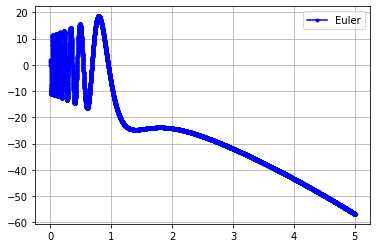

In [142]:
 t = np.linspace(0,5,10000)
y0 = 0
v=26.5
b=30
v0=2.8

#f = lambda y,t: y
y = x_bis_skrót(v,b,k1,k2,omega0,t,tał)
#y_true = np.exp(t) #nieistotne jakby co
plt.plot(t,y,'b.-')#,t,y_true,'r-')
plt.legend(['Euler','True'])
#plt.axis([0,2,0,9])
plt.grid(True)
#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()

In [143]:
def y_bis_skrót(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=x_prime(v,b)
    dy=y_prime(v,b)
    #k=k1+[(k2-k1)/(np.cos(omega0))]*(-1)*(f/ v)
    k=k1+(k2-k1)/(np.cos(omega0))*(-1)*(dy/ v)
    w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    t = np.linspace(0,10,1000)
    
    
    #ddx=-(1/m)*k*(v*dx*np.cos(omega)+v*f*np.sin(omega))
    #rozwiązanie
    #m*r**2+k*(v*r*np.cos(omega))+k*v*f*np.sin(omega)=0
    
    ddy=-(1/m)*(k*(v*dy*np.cos(omega)+v*f*np.sin(omega))-m*g)
    return ddy

In [144]:
y_bis_skrót(v,b,k1,k2,omega0,t,tał)

array([-1.13988432, -0.99109453, -0.78567183, ..., 86.09622064,
       86.10598611, 86.1157522 ])

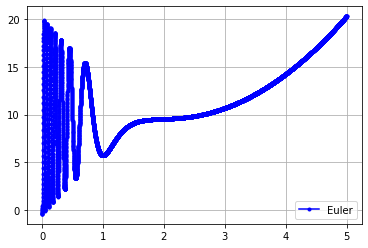

In [145]:
 t = np.linspace(0,5,10000)
y0 = 0
v=26.5
b=20
v0=2.8

#f = lambda y,t: y
y = y_bis_skrót(v,b,k1,k2,omega0,t,tał)
#y_true = np.exp(t) #nieistotne jakby co
plt.plot(t,y,'b.-')#,t,y_true,'r-')
plt.legend(['Euler','True'])
#plt.axis([0,2,0,9])
plt.grid(True)

#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()

(0.0, 50.0)

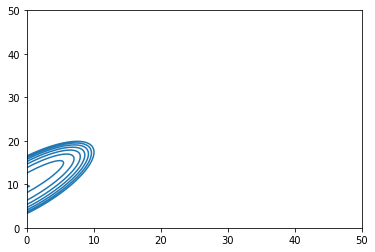

In [146]:
plt.plot(x_bis_skrót(v,b,k1,k2,omega0,t,tał), y_bis_skrót(v,b,k1,k2,omega0,t,tał)
        )  
ax = plt.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

**Z WIATREM**

In [38]:
def x_bis2(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    k=(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v
    omega=omega0(1-np.exp(-t/tał))
    
    ddx= lambda y,t: -(1/m)*w*(x_prime2(v,b)*np.cos(omega)+y_prime2(v,b)*np.sin(omega))
    return ddx

def y_bis2(v,b,k1,k2,omega0,t,tał): #2pochodna y
    g=9.81
    k=(k2-k1)/(np.cos(omega0))*(-1)*(y_prime2(v,b)/v)
    w=k*v**2
    omega=omega0(1-np.exp(-t/tał))
    
    ddy=(1/m)*w*np.sin(omega+b)- m*g
    return ddy